In [1]:
! pip install opencv-python
! pip install opencv-python-headless
! pip install numpy


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

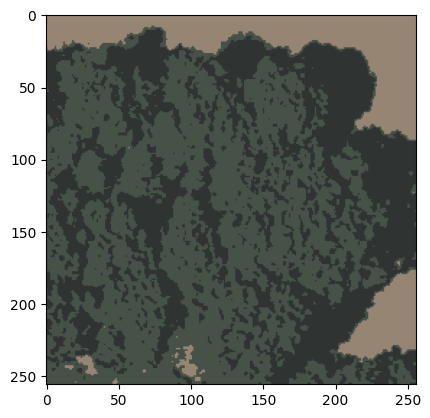

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Charger l'image
image = cv2.imread('images/0_36.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Redimensionner l'image si nécessaire
#image = cv2.resize(image, (width, height))

# Reshape l'image en un tableau 2D de pixels
pixels = image.reshape(-1, 3)

# Appliquer K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(pixels)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

# Reshape en image
segmented_img = segmented_img.reshape(image.shape).astype(np.uint8)

# Afficher l'image segmentée
plt.imshow(segmented_img)
plt.show()


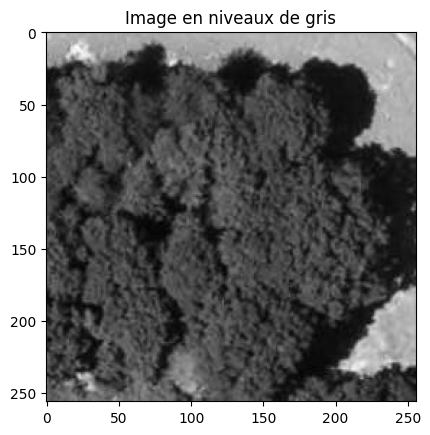

In [29]:
image = cv2.imread('images/0_36.jpeg')

# Convertir en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Image en niveaux de gris')
plt.show()


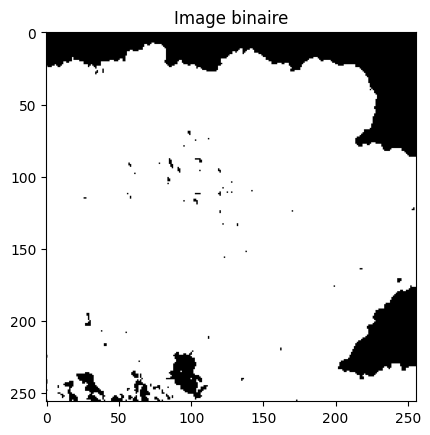

In [30]:
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(binary, cmap='gray')
plt.title('Image binaire')
plt.show()


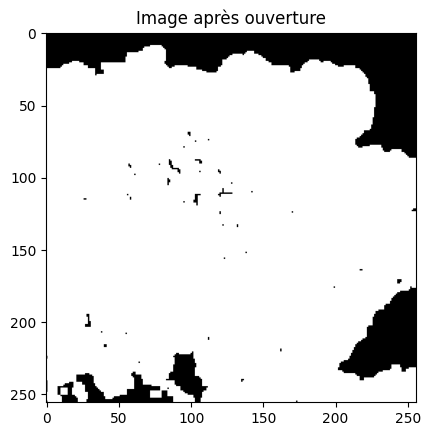

In [31]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(opening, cmap='gray')
plt.title('Image après ouverture')
plt.show()


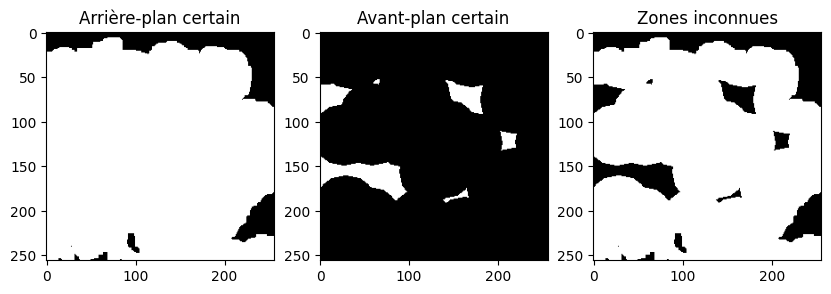

In [32]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(sure_bg, cmap='gray'), plt.title('Arrière-plan certain')
plt.subplot(132), plt.imshow(sure_fg, cmap='gray'), plt.title('Avant-plan certain')
plt.subplot(133), plt.imshow(unknown, cmap='gray'), plt.title('Zones inconnues')
plt.show()


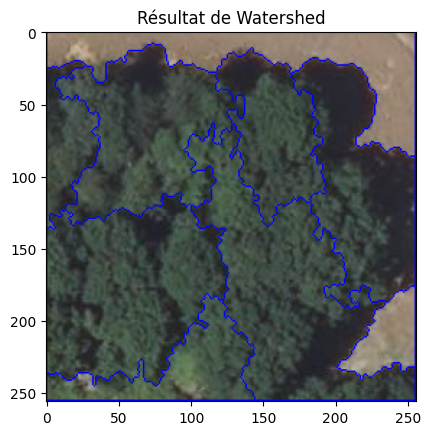

In [33]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Résultat de Watershed')
plt.show()